In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import VotingClassifier
warnings.filterwarnings("ignore")

In [9]:
dataset = pd.read_csv('cancer1.csv')

In [10]:
dataset.drop(['A'],axis=1,inplace=True)

In [11]:
dataset['Gender'][dataset['Gender']=='F']=0
dataset['Gender'][dataset['Gender']=='M']=1

In [12]:
dataset.head()

,Gender,Age,Target,Albumin,Albumin/Globulin,Leukocyte,Alanine Aminotransferase (ALT),Percentage of Monocyte,Absolute of Monocyte,Red Blood Cell,...,Aspartate Transaminase (AST),Hemoglobin,Platelet,Platelet Volume Distribution Width,Plateletcrit,Percentage of Neutrophil,Absolute of Neutrophil,Total Protein,AST/ALT,γ-Glutamyl Transpeptidase
0,0,68.0,1,41.3,1.16,11.19,21.1,4.90,0.55,4.76,...,30.3,141.0,264.0,12.1,0.28,76.2,8.52,77.0,1.44,26.100000
1,1,70.0,1,44.1,1.49,24.50,11.1,4.00,0.24,1.95,...,24.8,119.0,276.0,9.4,0.25,73.0,4.38,73.7,2.23,28.400000
2,0,53.0,1,31.3,0.78,6.21,30.0,8.50,0.53,3.41,...,15.0,109.0,169.0,7.9,0.13,55.6,3.45,71.4,0.50,49.226151
3,0,38.0,1,36.7,1.01,2.08,40.0,16.81,0.35,4.43,...,24.0,131.0,290.0,9.8,0.27,68.3,1.42,72.9,0.60,49.226151
4,0,41.0,1,41.8,1.55,8.17,58.1,7.00,0.57,4.42,...,41.1,138.0,241.0,12.3,0.26,71.0,5.80,68.7,0.71,124.500000


In [13]:
dataset

,Gender,Age,Target,Albumin,Albumin/Globulin,Leukocyte,Alanine Aminotransferase (ALT),Percentage of Monocyte,Absolute of Monocyte,Red Blood Cell,...,Aspartate Transaminase (AST),Hemoglobin,Platelet,Platelet Volume Distribution Width,Plateletcrit,Percentage of Neutrophil,Absolute of Neutrophil,Total Protein,AST/ALT,γ-Glutamyl Transpeptidase
0,0,68.0,1,41.3,1.16,11.190,21.10,4.90,0.55,4.760000,...,30.30,141.0,264.0,12.1,0.28,76.2,8.52,77.00,1.44,26.100000
1,1,70.0,1,44.1,1.49,24.500,11.10,4.00,0.24,1.950000,...,24.80,119.0,276.0,9.4,0.25,73.0,4.38,73.70,2.23,28.400000
2,0,53.0,1,31.3,0.78,6.210,30.00,8.50,0.53,3.410000,...,15.00,109.0,169.0,7.9,0.13,55.6,3.45,71.40,0.50,49.226151
3,0,38.0,1,36.7,1.01,2.080,40.00,16.81,0.35,4.430000,...,24.00,131.0,290.0,9.8,0.27,68.3,1.42,72.90,0.60,49.226151
4,0,41.0,1,41.8,1.55,8.170,58.10,7.00,0.57,4.420000,...,41.10,138.0,241.0,12.3,0.26,71.0,5.80,68.70,0.71,124.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,0,59.0,5,35.2,0.92,5.860,18.70,12.10,1.88,1.736667,...,15.85,122.0,382.0,10.6,0.39,76.8,11.98,74.05,0.90,35.000000
6351,0,63.0,5,39.5,1.52,2.650,20.25,17.00,0.90,2.385000,...,20.65,142.0,237.0,14.3,0.29,45.4,2.41,65.85,1.15,11.000000
6352,0,7.0,5,40.4,1.62,4.045,6.20,7.00,0.43,2.625000,...,17.70,114.0,281.0,9.9,0.26,57.2,3.50,65.40,2.90,11.000000
6353,1,56.0,5,34.8,1.00,8.545,4.10,7.70,0.35,3.640000,...,10.70,117.0,196.0,13.4,0.23,66.2,3.01,68.60,2.60,9.000000


In [14]:
ind=dataset['Target']!=0
dataset1=dataset.loc[ind,]

In [15]:
dataset1

,Gender,Age,Target,Albumin,Albumin/Globulin,Leukocyte,Alanine Aminotransferase (ALT),Percentage of Monocyte,Absolute of Monocyte,Red Blood Cell,...,Aspartate Transaminase (AST),Hemoglobin,Platelet,Platelet Volume Distribution Width,Plateletcrit,Percentage of Neutrophil,Absolute of Neutrophil,Total Protein,AST/ALT,γ-Glutamyl Transpeptidase
0,0,68.0,1,41.3,1.16,11.190,21.10,4.90,0.55,4.760000,...,30.30,141.0,264.0,12.1,0.28,76.2,8.52,77.00,1.44,26.100000
1,1,70.0,1,44.1,1.49,24.500,11.10,4.00,0.24,1.950000,...,24.80,119.0,276.0,9.4,0.25,73.0,4.38,73.70,2.23,28.400000
2,0,53.0,1,31.3,0.78,6.210,30.00,8.50,0.53,3.410000,...,15.00,109.0,169.0,7.9,0.13,55.6,3.45,71.40,0.50,49.226151
3,0,38.0,1,36.7,1.01,2.080,40.00,16.81,0.35,4.430000,...,24.00,131.0,290.0,9.8,0.27,68.3,1.42,72.90,0.60,49.226151
4,0,41.0,1,41.8,1.55,8.170,58.10,7.00,0.57,4.420000,...,41.10,138.0,241.0,12.3,0.26,71.0,5.80,68.70,0.71,124.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,0,59.0,5,35.2,0.92,5.860,18.70,12.10,1.88,1.736667,...,15.85,122.0,382.0,10.6,0.39,76.8,11.98,74.05,0.90,35.000000
6351,0,63.0,5,39.5,1.52,2.650,20.25,17.00,0.90,2.385000,...,20.65,142.0,237.0,14.3,0.29,45.4,2.41,65.85,1.15,11.000000
6352,0,7.0,5,40.4,1.62,4.045,6.20,7.00,0.43,2.625000,...,17.70,114.0,281.0,9.9,0.26,57.2,3.50,65.40,2.90,11.000000
6353,1,56.0,5,34.8,1.00,8.545,4.10,7.70,0.35,3.640000,...,10.70,117.0,196.0,13.4,0.23,66.2,3.01,68.60,2.60,9.000000


In [16]:
dataset1['Target'][dataset1['Target']==1]=0
dataset1['Target'][dataset1['Target']==5]=1

In [17]:
dataset

,Gender,Age,Target,Albumin,Albumin/Globulin,Leukocyte,Alanine Aminotransferase (ALT),Percentage of Monocyte,Absolute of Monocyte,Red Blood Cell,...,Aspartate Transaminase (AST),Hemoglobin,Platelet,Platelet Volume Distribution Width,Plateletcrit,Percentage of Neutrophil,Absolute of Neutrophil,Total Protein,AST/ALT,γ-Glutamyl Transpeptidase
0,0,68.0,1,41.3,1.16,11.190,21.10,4.90,0.55,4.760000,...,30.30,141.0,264.0,12.1,0.28,76.2,8.52,77.00,1.44,26.100000
1,1,70.0,1,44.1,1.49,24.500,11.10,4.00,0.24,1.950000,...,24.80,119.0,276.0,9.4,0.25,73.0,4.38,73.70,2.23,28.400000
2,0,53.0,1,31.3,0.78,6.210,30.00,8.50,0.53,3.410000,...,15.00,109.0,169.0,7.9,0.13,55.6,3.45,71.40,0.50,49.226151
3,0,38.0,1,36.7,1.01,2.080,40.00,16.81,0.35,4.430000,...,24.00,131.0,290.0,9.8,0.27,68.3,1.42,72.90,0.60,49.226151
4,0,41.0,1,41.8,1.55,8.170,58.10,7.00,0.57,4.420000,...,41.10,138.0,241.0,12.3,0.26,71.0,5.80,68.70,0.71,124.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,0,59.0,5,35.2,0.92,5.860,18.70,12.10,1.88,1.736667,...,15.85,122.0,382.0,10.6,0.39,76.8,11.98,74.05,0.90,35.000000
6351,0,63.0,5,39.5,1.52,2.650,20.25,17.00,0.90,2.385000,...,20.65,142.0,237.0,14.3,0.29,45.4,2.41,65.85,1.15,11.000000
6352,0,7.0,5,40.4,1.62,4.045,6.20,7.00,0.43,2.625000,...,17.70,114.0,281.0,9.9,0.26,57.2,3.50,65.40,2.90,11.000000
6353,1,56.0,5,34.8,1.00,8.545,4.10,7.70,0.35,3.640000,...,10.70,117.0,196.0,13.4,0.23,66.2,3.01,68.60,2.60,9.000000


In [18]:
x1 = dataset1.drop('Target', axis=1) 
y1 = dataset1['Target']

In [19]:
x1

,Gender,Age,Albumin,Albumin/Globulin,Leukocyte,Alanine Aminotransferase (ALT),Percentage of Monocyte,Absolute of Monocyte,Red Blood Cell,Mean Corpuscular Volume,...,Aspartate Transaminase (AST),Hemoglobin,Platelet,Platelet Volume Distribution Width,Plateletcrit,Percentage of Neutrophil,Absolute of Neutrophil,Total Protein,AST/ALT,γ-Glutamyl Transpeptidase
0,0,68.0,41.3,1.16,11.190,21.10,4.90,0.55,4.760000,89.5,...,30.30,141.0,264.0,12.1,0.28,76.2,8.52,77.00,1.44,26.100000
1,1,70.0,44.1,1.49,24.500,11.10,4.00,0.24,1.950000,92.3,...,24.80,119.0,276.0,9.4,0.25,73.0,4.38,73.70,2.23,28.400000
2,0,53.0,31.3,0.78,6.210,30.00,8.50,0.53,3.410000,96.2,...,15.00,109.0,169.0,7.9,0.13,55.6,3.45,71.40,0.50,49.226151
3,0,38.0,36.7,1.01,2.080,40.00,16.81,0.35,4.430000,88.3,...,24.00,131.0,290.0,9.8,0.27,68.3,1.42,72.90,0.60,49.226151
4,0,41.0,41.8,1.55,8.170,58.10,7.00,0.57,4.420000,95.0,...,41.10,138.0,241.0,12.3,0.26,71.0,5.80,68.70,0.71,124.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,0,59.0,35.2,0.92,5.860,18.70,12.10,1.88,1.736667,74.7,...,15.85,122.0,382.0,10.6,0.39,76.8,11.98,74.05,0.90,35.000000
6351,0,63.0,39.5,1.52,2.650,20.25,17.00,0.90,2.385000,95.0,...,20.65,142.0,237.0,14.3,0.29,45.4,2.41,65.85,1.15,11.000000
6352,0,7.0,40.4,1.62,4.045,6.20,7.00,0.43,2.625000,87.5,...,17.70,114.0,281.0,9.9,0.26,57.2,3.50,65.40,2.90,11.000000
6353,1,56.0,34.8,1.00,8.545,4.10,7.70,0.35,3.640000,92.2,...,10.70,117.0,196.0,13.4,0.23,66.2,3.01,68.60,2.60,9.000000


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size= 0.2, random_state= 0)

In [21]:
x_train

,Gender,Age,Albumin,Albumin/Globulin,Leukocyte,Alanine Aminotransferase (ALT),Percentage of Monocyte,Absolute of Monocyte,Red Blood Cell,Mean Corpuscular Volume,...,Aspartate Transaminase (AST),Hemoglobin,Platelet,Platelet Volume Distribution Width,Plateletcrit,Percentage of Neutrophil,Absolute of Neutrophil,Total Protein,AST/ALT,γ-Glutamyl Transpeptidase
751,0,61.0,37.7,1.3,4.8300,10.100000,8.65,0.455,3.096667,95.9,...,22.200000,145.0,217.5,9.65,0.200,72.35,3.795,67.3,2.200000,17.900000
325,0,62.0,40.6,1.1,6.1300,27.823285,4.90,0.300,5.260000,89.4,...,30.521666,154.0,138.0,24.00,0.190,60.80,3.730,79.2,1.363761,49.226151
6128,0,0.0,45.2,2.3,10.6200,42.500000,8.94,0.940,4.340000,86.9,...,58.400000,125.0,480.0,11.10,0.490,8.20,0.870,64.7,1.400000,62.200000
917,0,60.0,33.0,0.9,5.4825,18.600000,8.95,0.630,2.792500,105.6,...,31.850000,130.5,266.5,11.65,0.275,63.00,4.410,68.2,1.750000,36.800000
1091,0,64.0,43.4,1.6,6.0300,22.000000,7.10,0.430,4.990000,101.0,...,20.000000,156.0,225.0,9.90,0.210,46.30,2.790,70.9,0.900000,49.226151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1,64.0,41.7,1.2,8.6500,17.000000,8.00,0.690,4.440000,96.8,...,20.000000,133.0,196.0,14.80,0.230,60.90,5.270,76.4,1.200000,49.226151
4949,0,75.0,27.2,1.0,5.9050,25.800000,6.90,0.435,3.260000,95.7,...,24.800000,122.0,370.5,12.85,0.400,77.30,4.910,55.5,0.950000,87.800000
1653,0,52.0,41.3,1.2,7.8850,39.500000,8.74,1.320,3.115000,91.2,...,31.000000,144.0,529.0,12.40,0.570,60.90,9.190,75.5,0.800000,303.100000
4292,0,54.0,34.9,1.7,4.5850,39.000000,6.00,0.235,3.262500,95.6,...,36.200000,138.5,220.0,10.90,0.215,40.40,1.605,55.6,0.900000,29.100000


In [22]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (3736, 41)
Number transactions y_train dataset:  (3736,)
Number transactions x_test dataset:  (934, 41)
Number transactions y_test dataset:  (934,)


In [23]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [26]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Gradiesnt Boost', GradientBoostingClassifier(random_state=0)])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[398  68]
 [100 368]]
Accuracy Score:  0.8201284796573876

K-Fold Validation Mean Accuracy: 80.91 %

Standard Deviation: 1.48 %

ROC AUC Score: 0.82

Precision: 0.84

Recall: 0.79

F1: 0.81
-----------------------------------

Decision Tree :
[[380  86]
 [ 77 391]]
Accuracy Score:  0.8254817987152034

K-Fold Validation Mean Accuracy: 82.47 %

Standard Deviation: 1.35 %

ROC AUC Score: 0.83

Precision: 0.82

Recall: 0.84

F1: 0.83
-----------------------------------

Gradiesnt Boost :
[[420  46]
 [ 68 400]]
Accuracy Score:  0.8779443254817987

K-Fold Validation Mean Accuracy: 88.54 %

Standard Deviation: 1.07 %

ROC AUC Score: 0.88

Precision: 0.90

Recall: 0.85

F1: 0.88
-----------------------------------



In [27]:
#超参数选择
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (GradientBoostingClassifier(),[{'n_estimators':[100,150,200],'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}]),]

In [30]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 80.94%
Best Parameters :  {'C': 0.25, 'random_state': 0}

----------------

DecisionTreeClassifier():
Best Accuracy : 82.47%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

GradientBoostingClassifier():
Best Accuracy : 89.00%
Best Parameters :  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200, 'random_state': 0}

----------------



              precision    recall  f1-score   support

           0       0.86      0.89      0.88       466
           1       0.89      0.86      0.87       468

    accuracy                           0.87       934
   macro avg       0.88      0.87      0.87       934
weighted avg       0.88      0.87      0.87       934

ROC AUC score: 0.957684512673783
Accuracy Score:  0.8747323340471093


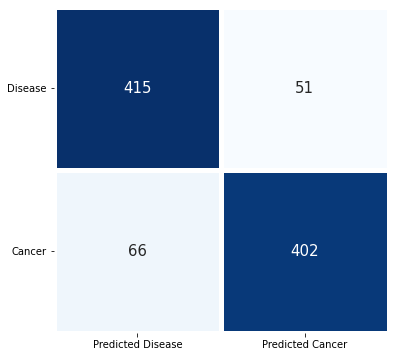

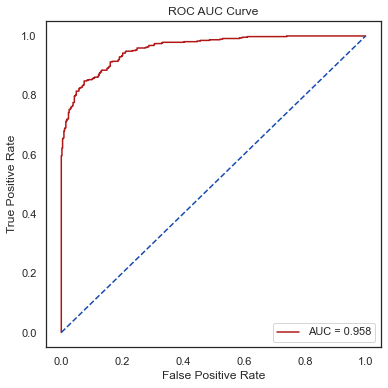

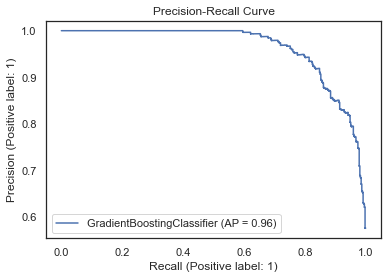

In [31]:
#Fitting GradientBoostingClassifier Model
classifier = GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.1, loss= 'exponential', n_estimators= 200, random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Disease', 'Cancer'], xticklabels = ['Predicted Disease', 'Predicted Cancer'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()



In [32]:
x_train=pd.DataFrame(x_train)
x_train.columns=x1.columns

In [33]:
classifier=classifier.fit(x_train, y_train)
classifier.feature_importances_
pd.DataFrame(classifier.feature_importances_,x_train.columns,columns=['Importances']).sort_values(by=['Importances'],ascending=False)

,Importances
Age,0.559178
Total Protein,0.060149
Red Blood Cell,0.054110
Alkaline Phosphatase,0.038365
Albumin,0.033793
Uric Acid,0.031106
Creatinine,0.029995
Carbamide,0.027073
Indirect Bilirubin,0.013741
Glucose,0.012115
